In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [11]:
# read the csv
df=pd.read_csv('./ML374_S5_Practice_Income_Data.csv')
df.head()
columns=df.columns.tolist()
ignore_cols = ["Relationship", "Marital_Status", "Income_Bracket"]

In [12]:
label_encoder = LabelEncoder()
for col in columns:
    if col not in ignore_cols:

        # Only encode non-numeric columns
        if df[col].dtype == "object":
            encode_col = col + "_encode"
            df[encode_col] = label_encoder.fit_transform(df[col])

In [13]:
# extract the numeric columns alone
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)
new_income_df = df[numeric_cols]

Numeric columns: ['Age', 'Fnlwgt', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'WorkClass_encode', 'Education_encode', 'Occupation_encode', 'Gender_encode', 'Native_Country_encode']


In [14]:
# define dimensions for subplots
num_plots = len(numeric_cols)
num_cols = 4  
num_rows = (num_plots + num_cols - 1) 

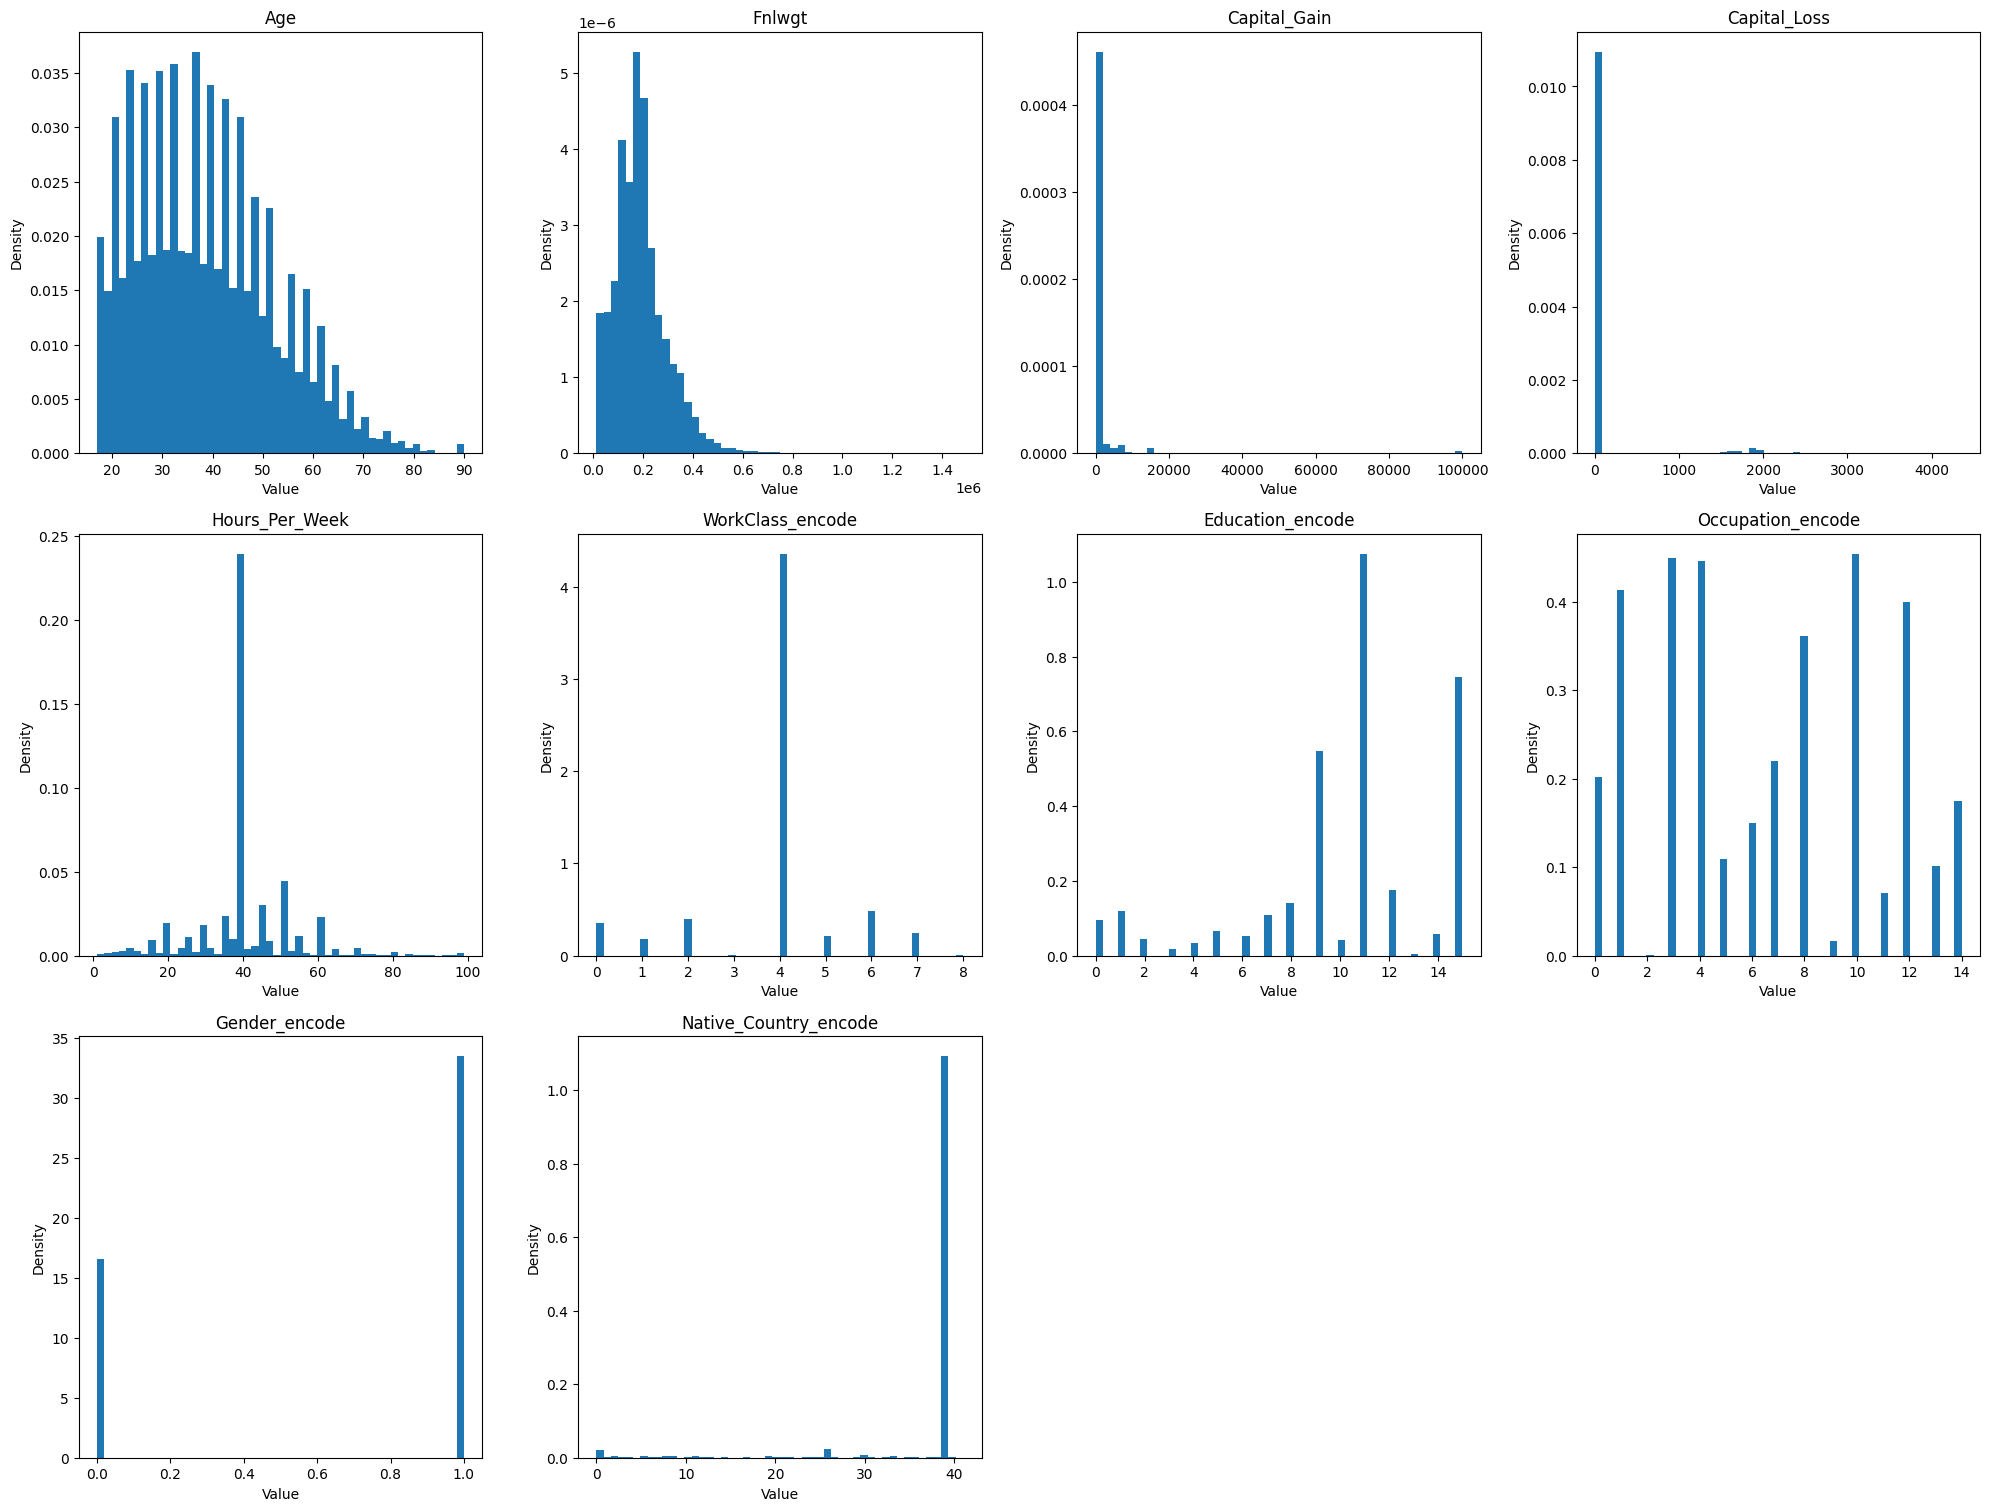

In [15]:
# plot the subplots
plt.figure(figsize=(20, 5 * num_rows))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(new_income_df[column], bins=50, density=True)
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()